# T2.1 Funcions discriminants

# Índex

1. Funcions discriminants
2. Funcions discriminants lineals
3. Fronteres de decisió
4. Regions de decisió
5. Classificadors equivalents

# 1 Funcions discriminants

**Notació:**
* **Objectes (entrades):** $\;\boldsymbol{x}\in\mathcal{X},\,$ típicament vectors de $D$ característiques reals, $\,\mathcal{X}=\mathbb{R}^D,\,D\geq 1$
* **Etiquetes de classe (eixides):** $\;y\in\mathcal{Y}\,$ o $\,c\in\mathcal{C},\,$ típicament $\,\mathcal{Y}=\mathcal{C}=\{1,\dotsc,C\},\,C\geq 2$ 

**Representació clàssica de classificadors:** $\;$ amb una **funció discriminant** per classe, $\,g_c(\cdot),\,$ que mesura la (pseudo-)probabilitat de pertànyer a $c$
$$c(\boldsymbol{x}) = \argmax\limits_c\; g_c(\boldsymbol{x})$$

**Exemple:** $\;$ classificador en 3 classes per a $\,\boldsymbol{x}=(x_1,x_2)^t\in [0,1]^2$
$$\begin{array}{cccccc}x_1&x_2&
g_1(\boldsymbol{x})&g_2(\boldsymbol{x})&g_3(\boldsymbol{x})&c(\boldsymbol{x})\\\hline 
0 & 0 & 1.0 & 0.0 & 0.0 & 1\\
0 & 1 & \tfrac{1}{3} & \tfrac{1}{3} & \tfrac{1}{3} & 1\\
1 & 0 & 0.25 & 0.5 & 0.25 & 2\\
1 & 1 & 0.01 & 0.01 & 0.98 & 3\\\hline 
\end{array}$$

**Regla de decisió de Bayes:** $\;$ amb $\,g_c(x) = P(c\mid x)\,$ o $\,g_c(x) = P(c)\,p(x\mid c)$

# 2 Funcions discriminants lineals

**Funció discriminant lineal:** $\;$ funció lineal amb les característiques
$$g_c(\boldsymbol{x})=\sum_d w_{cd}\,x_d + w_{c0} = \boldsymbol{w}_c^t\,\boldsymbol{x} + w_{c0}$$
* $\boldsymbol{w}_c=(w_{c1},w_{c2},\dotsc,w_{cD})^t$ és el **vector de pesos** de la classe $c$
* $w_{c0}$ és el **pes llindar** de la classe $c$

**Exemple:** $\;C=2,\, x\in\mathbb{R},\, g_1(x)=4x-4,\, g_2(x)=12x-36$

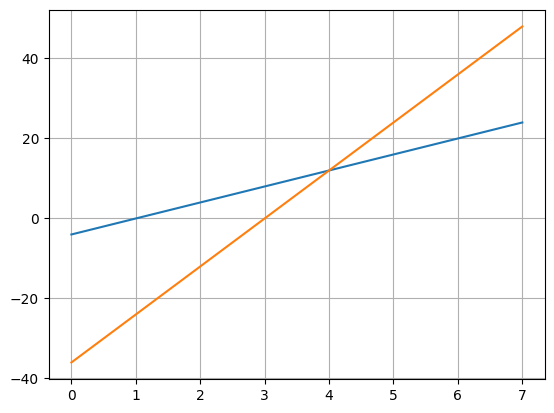

In [1]:
import numpy as np; import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4; g2 = lambda x: 12*x-36; x = np.linspace(0, 7, 200)
plt.grid(); plt.plot(x, g1(x), x, g2(x));

# 3 Fronteres de decisió
       
La \empha{frontera de decisió} entre dues classes, $c$ i $c'$, és el
lloc geo\-mè\-tric dels punts $\boldsymbol{x}\in E\,$ on es compleix:
      
\begin{displaymath}
  g_c(\boldsymbol{x}) = g_{c'}(\boldsymbol{x}) \qquad \text{per a tot} ~~c\neq c'
\end{displaymath}
\vspace*{1mm}
% \textbf{Ejemplo:} Un classificador lineal en 2 clases
\begin{center}
\psset{xunit=20mm,yunit=1.75mm}
\begin{pspicture}(0,0)(8,40)
\psaxes[Dy=10]{->}(8,40)
% xlabel
\rput(8,-3){$x$}
% ylabel
\rput(-0.5,40){$g(x)$}
% classe negre
% \psdots[dotstyle=*,dotsize=1pt 7](1,0)(2,0)(3,0)
% \rput(2,-8){$R_1$}
\pstextpath[c]{%
\psline[linewidth=1pt](0.5,-2)(4,12)}{\raisebox{1em}{$g_1(x)=4x-4$}}
\psline[linewidth=1pt](4,12)(8,28)
% classe blanc
% \psdots[dotstyle=o,dotsize=1pt 7](5,0)(7,0)
% \rput(6,-8){$R_2$}
\pstextpath[c]{%
\psline[linestyle=dashed,dash=1pt 3pt,linewidth=2pt](4,12)(6.25,39)}{%
  \raisebox{1em}{$g_2(x)=12x-36$}}
\psline[linestyle=dashed,dash=1pt 3pt,linewidth=2pt](4,12)(2.5,-6)
% frontera
\psline[linestyle=dashed,dash=3pt 3pt,linewidth=2pt](4,0)(4,12)
\psdots[dotstyle=*,dotsize=8pt 7](4,0)
\end{pspicture}
\end{center}

\begin{displaymath}
g_1(x) = g_2(x) \rightarrow 4x-4 = 12x-36 \rightarrow x = \frac{32}{8}=4
\end{displaymath}

\cp %---------------------------------------------------------------------------
\section*{Fronteres de decisió}
          
La \empha{frontera de decisió} entre dues classes, $c$ i $c'$, amb
$\boldsymbol{x}\in E$ és:

\vspace{5mm}
\begin{itemize}\itemsep=10mm
 \item Un punt,  si $E\equiv\floats$
 \item Una línia (ex. \emph{rectes}), si $E\equiv\floats^2$
 \item Una superfície (ex. \emph{plans}), si $E\equiv\floats^3$ 
\end{itemize}

\vspace*{20mm} %
En general són \emph{hipersuperfícies} definides per les equacions:

\[g_c(\boldsymbol{x})-g_{c'}(\boldsymbol{x})=0\qquad \text {per a tot} ~~c\neq c'\]

% \vspace*{10mm}
% La \empha{frontera de decisión de una clase ~$i$} es el lugar geométrico 
% de los puntos $\mathbf{x}\in E$ para los que:
% \[g_i(\mathbf{x}) ~=~ \max_{j\neq i} ~ g_j(\mathbf{x})~~~~~~~~~~~\]





# 4 Regions de decisió

% \begin{minipage}{220mm}
Un classificador en $C$ classes divideix l'espai de representació en
$C$ \empha{regions de decisió}, $R_1,\ldots,R_C$:
\begin{displaymath}
  R_c=\biggl\{\mathbf{x}\in E:~~ %
              g_c(\mathbf{x})>\max_{c'\neq c} \; g_{c'}(\mathbf{x})\biggr\}
\end{displaymath}

%\vspace{5mm}
\begin{center}
\psset{xunit=20mm,yunit=1.75mm}
\begin{pspicture}(0,0)(8,40)
\psaxes[Dy=10]{->}(8,40)
% xlabel
\rput(8,-3){$x$}
% ylabel
\rput(-0.5,40){$g(x)$}
% classe negre
% \psdots[dotstyle=*,dotsize=1pt 7](1,0)(2,0)(3,0)
\rput(2,-8){$R_1$}
\rput(2,-12){$g_1(x)>g_2(x)$}
\pstextpath[c]{%
\psline[linewidth=1pt](0.5,-2)(4,12)}{\raisebox{1em}{$g_1(x)=4x-4$}}
\psline[linewidth=1pt](4,12)(8,28)
\psline[linewidth=4pt](0,0)(4,0)
% classe blanc
% \psdots[dotstyle=o,dotsize=1pt 7](5,0)(7,0)
\rput(6,-8){$R_2$}
\rput(6,-12){$g_2(x)>g_1(x)$}
\pstextpath[c]{%
\psline[linestyle=dashed,dash=1pt 3pt,linewidth=2pt](4,12)(6.25,39)}{%
  \raisebox{1em}{$g_2(x)=12x-36$}}
\psline[linestyle=dashed,dash=1pt 3pt,linewidth=2pt](4,12)(2.5,-6)
% frontera
\psdots[dotstyle=*,dotsize=8pt 7](4,0)
\psline[linestyle=dashed,dash=3pt 3pt,linewidth=2pt](4,0)(4,12)
\psline[linestyle=dashed,dash=3pt 3pt,linewidth=4pt](4,0)(8,0)
\end{pspicture}
\end{center}



# 5 Classificadors equivalents

Dos \empha{classificadors} $(g_1,\ldots,g_C)\ $ i $\
(g'_1,\ldots,g'_C)\ $ són \empha{equivalents} si defineixen les
mateixes fronteres i regions de decisió, és a dir:
\begin{displaymath}
  g_c(\mathbf{x})>g_{c'}(\mathbf{x}) \Leftrightarrow
  g'_c(\mathbf{x})>g'_{c'}(\mathbf{x}) \qquad \forall c'\neq c,~~
  \forall \mathbf{x}\in E
\end{displaymath}

Com obtenir classificadors equivalents?
\begin{align*}
  g'_c(\mathbf{x})=& \,a\cdot g_c(\mathbf{x})+b   
                   & \text{amb } & a > 0 & 1\leq c\leq C\\
  g'_c(\mathbf{x})=& \,\log\, g_c(\mathbf{x}) 
                   & \text{amb } & g_c(\mathbf{x})>0 & 1\leq c\leq C
\end{align*}

\vspace*{1mm}
Un classificador equivalent al $(g_1,g_2)$ de la traspa anterior:
\begin{align*}
  g'_1(x)=x-1 \; \text{ i } \; g'_2(x)=3x-9 \rightarrow x = \frac{8}{2}=4
\end{align*}
on $a=\frac{1}{4}$ i $b=0$.